C:\Users\kvasa\AppData\Local\Temp/ipykernel_18280/3937737867.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)


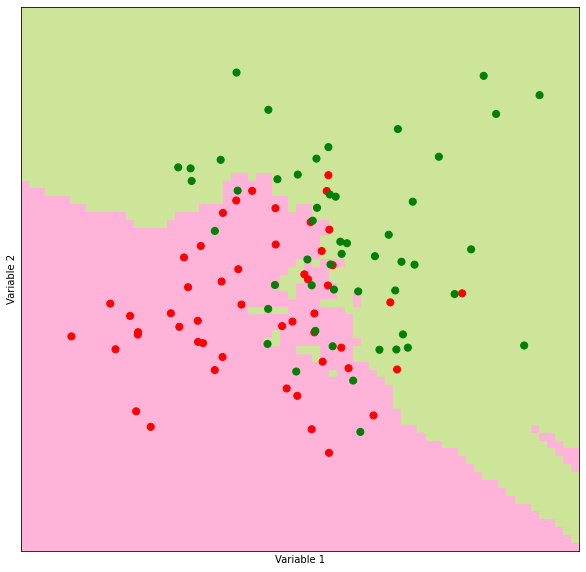

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

def distance(p1,p2):
    dis=np.sqrt(np.sum(np.power(p1-p2,2)))
    return dis

def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances)
    return ind[:k]

def majority_vote(votes):
    vote_count = {}
    for vote in votes:
        if vote in vote_count:
            vote_count[vote]+=1
        else:
            vote_count[vote]=1
    
    winners = [] #There can be more than one winner
    
    for v,c in vote_count.items():
        if c==max(vote_count.values()):
            winners.append(v)
    
    return random.choice(winners) #We are returning only one winner at random

def generate_synth_data(n=50):
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)

def knn_predict(p,points,outcomes, k):
    ind = find_nearest_neighbors(p,points,k)
    return majority_vote(outcomes[ind])

def make_prediction_grid(predictors, outcomes, limits, h, k):
    (x_min, x_max, y_min, y_max) = limits
    xs=np.arange(x_min,x_max,h)
    ys=np.arange(y_min,y_max,h)
    xx,yy=np.meshgrid(xs,ys)

    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array([x,y])
            prediction_grid[j,i]=knn_predict(p,predictors, outcomes, k)
            
    return (xx,yy,prediction_grid)
            
def plot_prediction_grid (xx, yy, prediction_grid):
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))

(predictors, outcomes) = generate_synth_data()
k=5
limits=(-3,4,-3,4)
h=0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx,yy,prediction_grid)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

points.shape[0]
points[0]

array([1, 1])

### How to use "argsort()"

In [2]:
import numpy as np
test = np.array([10,9,8,1,2,3])
print(np.argsort(test))
ind = np.argsort(test)
print("Original numpy array: ", test)
print("Sorted numpy array: ", test[ind])

[3 4 5 2 1 0]
Original numpy array:  [10  9  8  1  2  3]
Sorted numpy array:  [ 1  2  3  8  9 10]


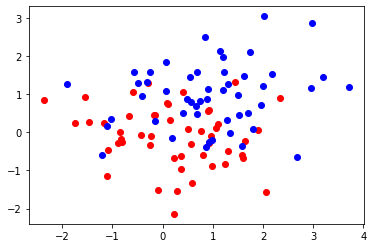

In [28]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
def generate_synth_data(n=50):
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    
    plt.plot(points[:n,0],points[:n,1],"ro")
    plt.plot(points[n:,0],points[n:,1],"bo")
    return (points, outcomes)

(point, outcomes) = generate_synth_data(50)



In [5]:
seasons = ["spring","summer","fall","winter"]

for ind , sea in enumerate(seasons):
    print(ind,sea)
    
list(enumerate(seasons))

0 spring
1 summer
2 fall
3 winter


[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

In [13]:
import numpy as np
import matplotlib.pyplot as plt


    
make_prediction_grid((1,10,1,10),1)

TypeError: make_prediction_grid() missing 2 required positional arguments: 'limits' and 'h'

### Winner from list of votes

In [179]:
import random
import scipy.s

def majority_vote(votes):
    vote_count = {}
    for vote in votes:
        if vote in vote_count:
            vote_count[vote]+=1
        else:
            vote_count[vote]=1
    
    winners = [] #There can be more than one winner
    
    for v,c in vote_count.items():
        if c==max(vote_count.values()):
            winners.append(v)
    
    return random.choice(winners) #We are returning only one winner at random
        

def majority_vote_scipy(votes):
    mode, count = ss.mstats.mode(votes)
    return mode   
    
    
votes=[1,1,1,1,2,2,2,3,3,3,3,4]
winner = majority_vote(votes)
winner_scipy = majority_vote_scipy(votes)
winner_scipy, winner

(array([1]), 3)

### Distance b/w two points

In [4]:
import numpy as np

def distance(p1,p2):
    dis=np.sqrt(np.sum(np.power(p1-p2,2)))
    return dis

p1=np.array([1,1])
p2=np.array([4,4])
distance(p1,p2)

4.242640687119285